In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference')
print(os.getcwd())

/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/sil_consistent_at_inference


In [2]:
import pprint
import glob
from pathlib import Path
import pickle
import random
import yaml
from PIL import Image

import numpy as np
import torch

from utils import general_utils, visualization_tools, eval_utils

In [3]:
device = torch.device("cuda:0")
classes = ["02691156"]
# path to the reconstruction dir. Must contain a "data_info".yaml file with its input_image_dir specified
# then, the input_image_dir must have a renders_camera_params.pt specifying the poses
for class_name in classes:
    input_dir_mesh = "/home/svcl-oowl/brandon/research/CVPR_2021_REFINE/occupancy_networks/out/pytorch3d_renders_training/{}/generation/meshes".format(class_name)

    # obtaining corresponding img dir using data_info.yaml
    with open(os.path.join(input_dir_mesh, "data_info.yaml"), 'r') as f:
        input_dir_img = yaml.load(f, Loader=yaml.FullLoader)["dataset"]["input_dir_img"]
    # getting uncorrected gt poses inside img dir
    uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))

    # correcting and saving the pose distances, to fit the reconstructions
    corrected_pred_poses_dict = general_utils.correct_dists(input_dir_img, input_dir_mesh, uncorrected_pred_poses_dict, device, num_dists=40)
    corrected_pred_poses_path = os.path.join(input_dir_mesh, "rec_camera_params.pt")
    pickle.dump(corrected_pred_poses_dict, open(corrected_pred_poses_path,"wb"))

skipped 329b62a63e882c7c71d03b466c72ce41
skipped cd6a3584c3da1db4abcfca680e6d54ff
skipped a849d4325008fbea85dfb1711fe4ff6d
skipped a14b262838529c2c81e1d9f6b27f1a92
skipped c6009ba1bf947303ca8607f540cc62ba
skipped 723921d0060203a344d33ea02fa0f619
skipped 32a2723086f770e9233d80f3ecb7c6d3
skipped d172705764e25e20884a857d19f7439f
skipped fb62efc64c58d1e5e0d07a8ce78b9182
skipped 7175100f99a61c9646322bce65ca3756
skipped e8c1e738997275799de8e648621673e1
skipped ff12c3a1d388b03044eedf822e07b7e4
skipped d30689ca6cdf2601f551b6c3f174499e
skipped cd9062c0065ee3a4727e0d1e650e3b69
skipped f8d8b590a0dcd399718ac2a6ddb54499
skipped 91bd6e91455f85fddcf9f917545742df
skipped 2a2caad9e540dcc687bf26680c510802
skipped 1f08b579e153b2de313f9af5275b7c70
skipped d8a037897d5d5b108130971b27e95927
skipped f25ffb9cf92236fb9671f5163e7f6535
skipped 6dedeb5b87ee318b2154ead1f7ab03aa



67b2e9282e92abe110ac482828ea39f -- uncorrected
{'azim': 249.3993682861328, 'elev': 40.0, 'dist': 1.0}


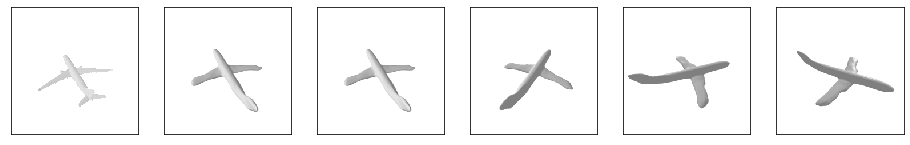

67b2e9282e92abe110ac482828ea39f -- corrected
{'azim': 249.3993682861328, 'elev': 40.0, 'dist': 1.2051281929016113}


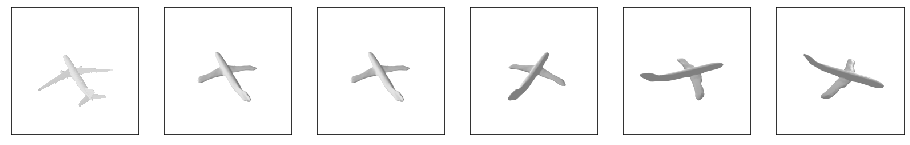

eb2fbd46563e23635fc197bbabcd5bd -- uncorrected
{'azim': 21.47749900817871, 'elev': 40.0, 'dist': 1.0}


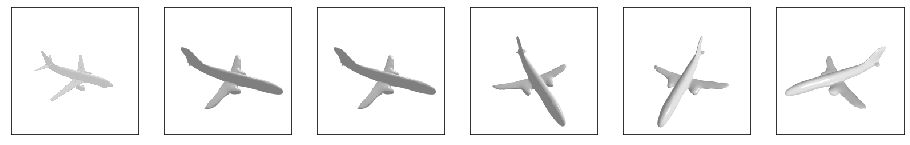

eb2fbd46563e23635fc197bbabcd5bd -- corrected
{'azim': 21.47749900817871, 'elev': 40.0, 'dist': 1.3974359035491943}


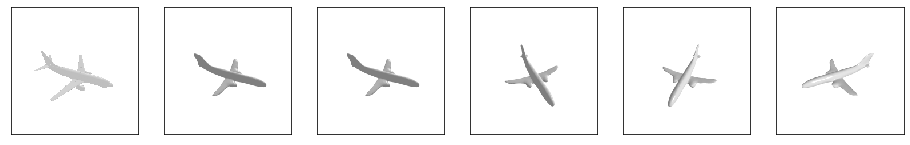

733afba7f61652e789850bc84e2ce90e -- uncorrected
{'azim': 58.62351989746094, 'elev': 40.0, 'dist': 1.0}


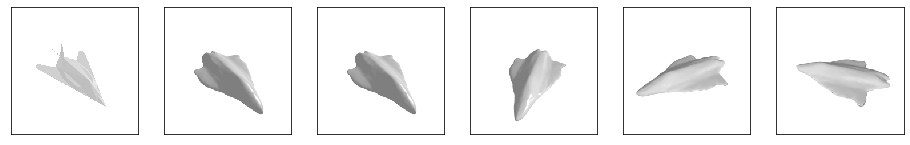

733afba7f61652e789850bc84e2ce90e -- corrected
{'azim': 58.62351989746094, 'elev': 40.0, 'dist': 1.2051281929016113}


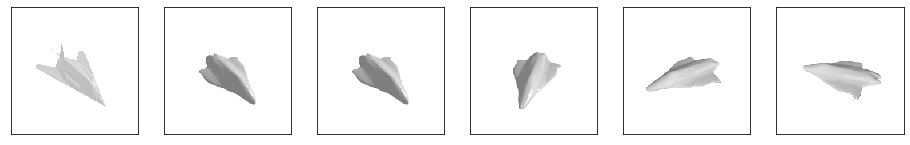

2502fffc569075b152486b4487d562c1 -- uncorrected
{'azim': 359.1430358886719, 'elev': 40.0, 'dist': 1.0}


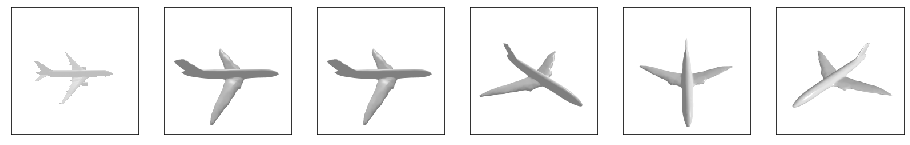

2502fffc569075b152486b4487d562c1 -- corrected
{'azim': 359.1430358886719, 'elev': 40.0, 'dist': 1.2692307233810425}


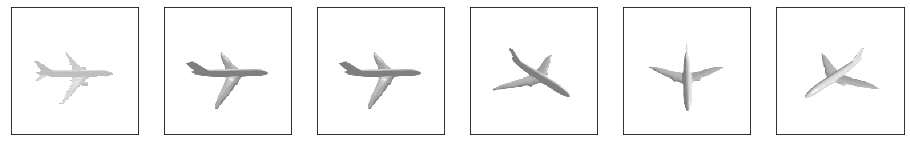

cf402c23d4ce807d847335355bf4459e -- uncorrected
{'azim': 135.8179473876953, 'elev': 40.0, 'dist': 1.0}


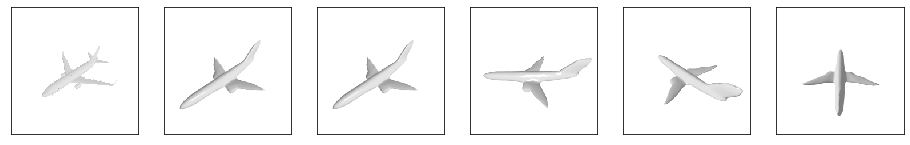

cf402c23d4ce807d847335355bf4459e -- corrected
{'azim': 135.8179473876953, 'elev': 40.0, 'dist': 1.3333332538604736}


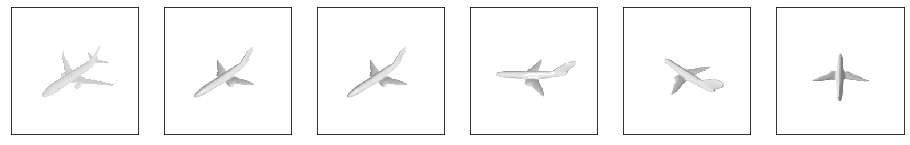

61c804d4751079962df73a6189a3b87 -- uncorrected
{'azim': 125.95260620117188, 'elev': 40.0, 'dist': 1.0}


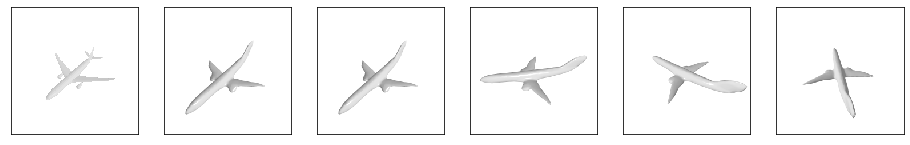

61c804d4751079962df73a6189a3b87 -- corrected
{'azim': 125.95260620117188, 'elev': 40.0, 'dist': 1.3333332538604736}


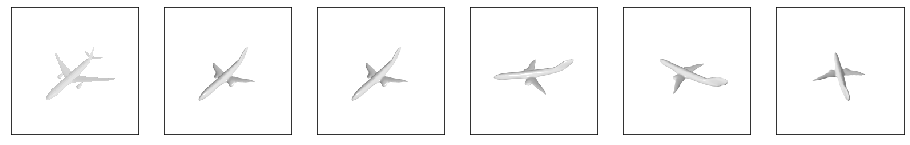

862f246e54900f48ed4212b3ec7c4371 -- uncorrected
{'azim': 265.47821044921875, 'elev': 40.0, 'dist': 1.0}


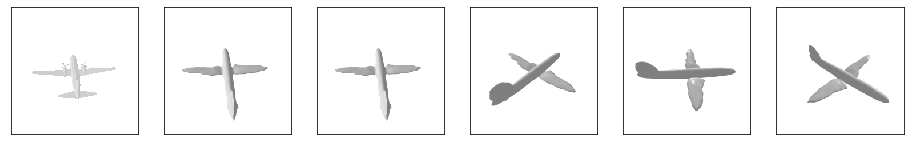

862f246e54900f48ed4212b3ec7c4371 -- corrected
{'azim': 265.47821044921875, 'elev': 40.0, 'dist': 1.0769230127334595}


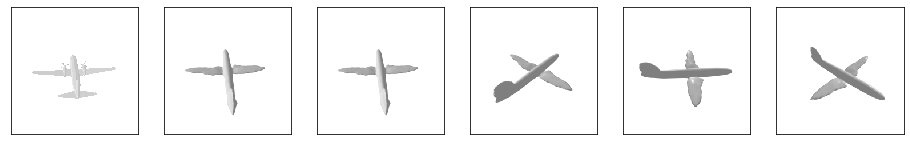

9eef6307dc504b88392b84e3285cce39 -- uncorrected
{'azim': 190.44027709960938, 'elev': 40.0, 'dist': 1.0}


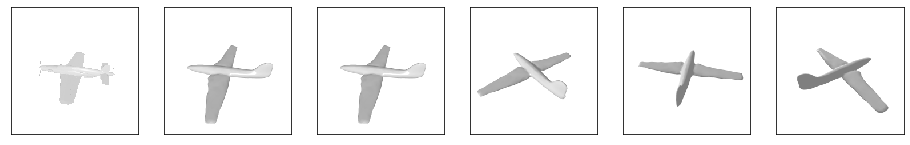

9eef6307dc504b88392b84e3285cce39 -- corrected
{'azim': 190.44027709960938, 'elev': 40.0, 'dist': 1.2692307233810425}


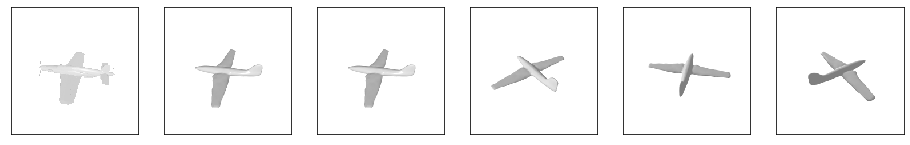

641af2da275049936cc53f9d72e7fec3 -- uncorrected
{'azim': 133.00047302246094, 'elev': 40.0, 'dist': 1.0}


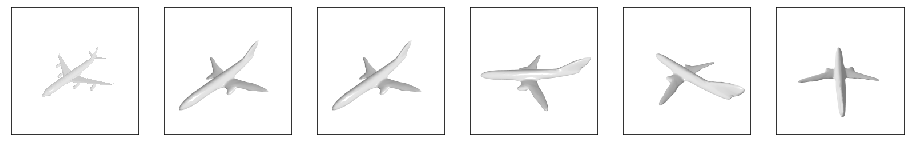

641af2da275049936cc53f9d72e7fec3 -- corrected
{'azim': 133.00047302246094, 'elev': 40.0, 'dist': 1.3333332538604736}


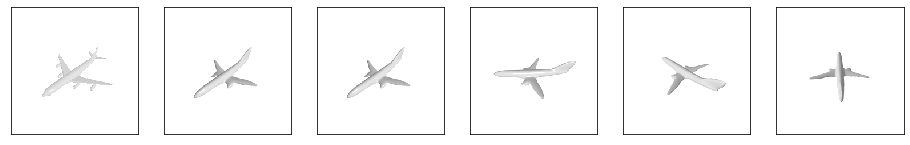

fef1c15a5db21b00a67cc8f661e7890a -- uncorrected
{'azim': 27.37411117553711, 'elev': 40.0, 'dist': 1.0}


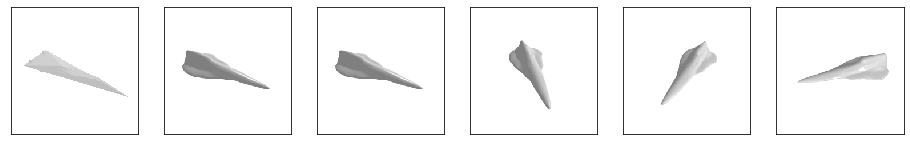

fef1c15a5db21b00a67cc8f661e7890a -- corrected
{'azim': 27.37411117553711, 'elev': 40.0, 'dist': 1.0128204822540283}


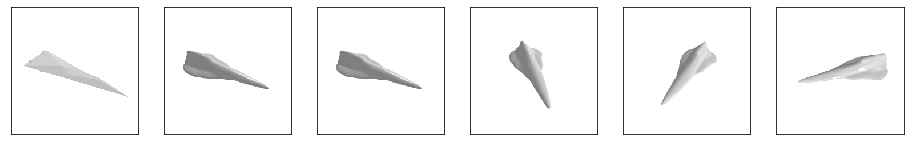

d1df81e184c71e0f26360e1e29a956c7 -- uncorrected
{'azim': 160.81639099121094, 'elev': 40.0, 'dist': 1.0}


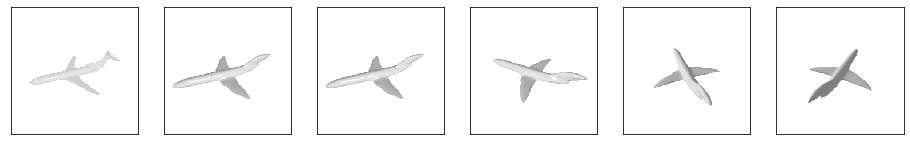

d1df81e184c71e0f26360e1e29a956c7 -- corrected
{'azim': 160.81639099121094, 'elev': 40.0, 'dist': 1.1410256624221802}


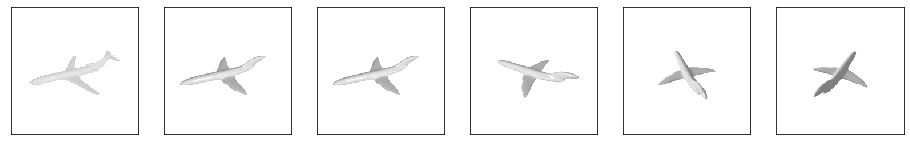

79e924263f903feb35fc197bbabcd5bd -- uncorrected
{'azim': 290.5730285644531, 'elev': 40.0, 'dist': 1.0}


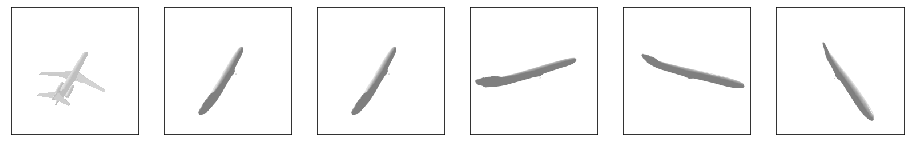

79e924263f903feb35fc197bbabcd5bd -- corrected
{'azim': 290.5730285644531, 'elev': 40.0, 'dist': 1.1410256624221802}


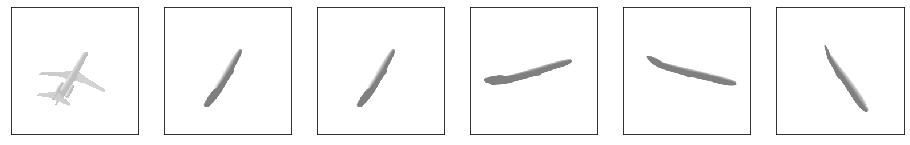

76851aaf721dcb63509012911cf74f29 -- uncorrected
{'azim': 0.2472996711730957, 'elev': 40.0, 'dist': 1.0}


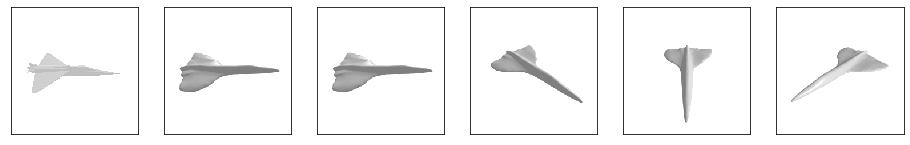

76851aaf721dcb63509012911cf74f29 -- corrected
{'azim': 0.2472996711730957, 'elev': 40.0, 'dist': 1.0769230127334595}


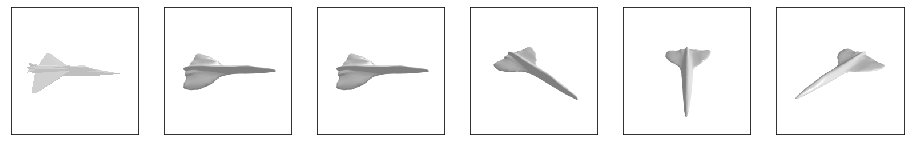

ec4f0bfd77978a1cca8607f540cc62ba -- uncorrected
{'azim': 122.780029296875, 'elev': 40.0, 'dist': 1.0}


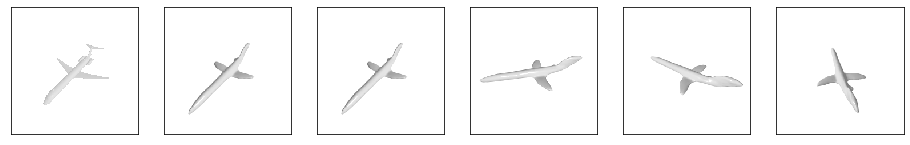

ec4f0bfd77978a1cca8607f540cc62ba -- corrected
{'azim': 122.780029296875, 'elev': 40.0, 'dist': 1.0769230127334595}


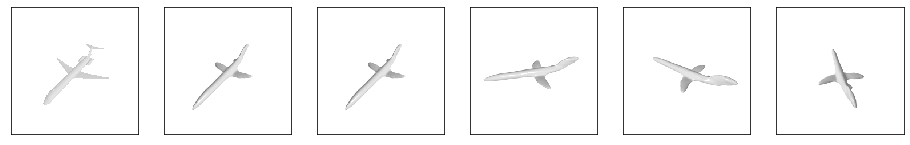

a1db8dcb7f1fcdd597190b73ffeacc5f -- uncorrected
{'azim': 302.5275573730469, 'elev': 40.0, 'dist': 1.0}


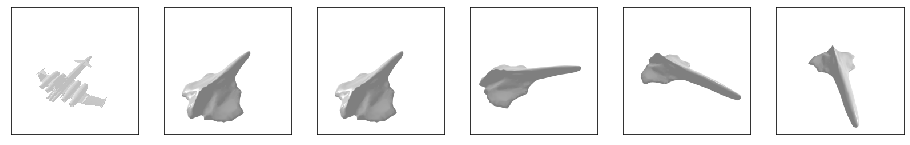

a1db8dcb7f1fcdd597190b73ffeacc5f -- corrected
{'azim': 302.5275573730469, 'elev': 40.0, 'dist': 1.3333332538604736}


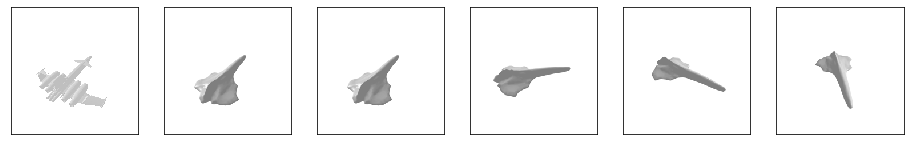

d605a53c0917acada80799ffaf21ea7d -- uncorrected
{'azim': 230.75503540039062, 'elev': 40.0, 'dist': 1.0}


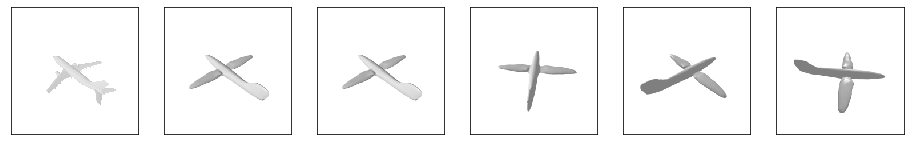

d605a53c0917acada80799ffaf21ea7d -- corrected
{'azim': 230.75503540039062, 'elev': 40.0, 'dist': 1.0769230127334595}


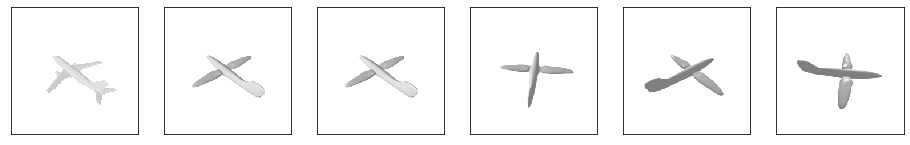

52764ef0877372245ddb9958cad651ae -- uncorrected
{'azim': 294.15496826171875, 'elev': 40.0, 'dist': 1.0}


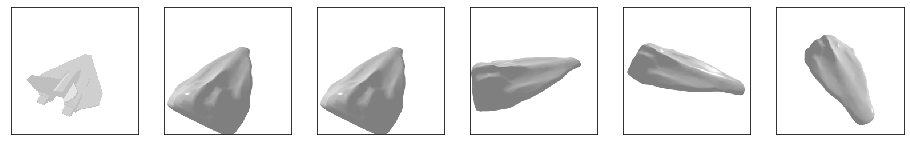

52764ef0877372245ddb9958cad651ae -- corrected
{'azim': 294.15496826171875, 'elev': 40.0, 'dist': 1.2692307233810425}


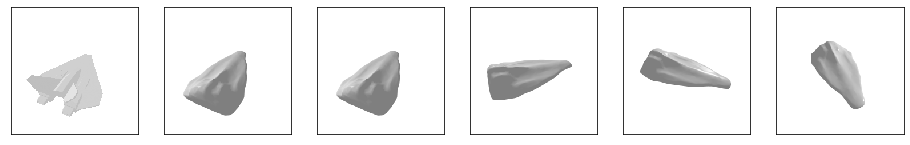

57b5666dfe2607ea1025c08d338b6d83 -- uncorrected
{'azim': 243.68504333496094, 'elev': 40.0, 'dist': 1.0}


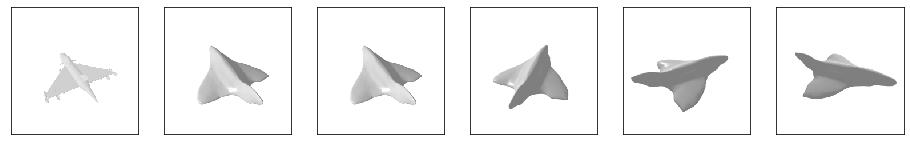

57b5666dfe2607ea1025c08d338b6d83 -- corrected
{'azim': 243.68504333496094, 'elev': 40.0, 'dist': 1.2692307233810425}


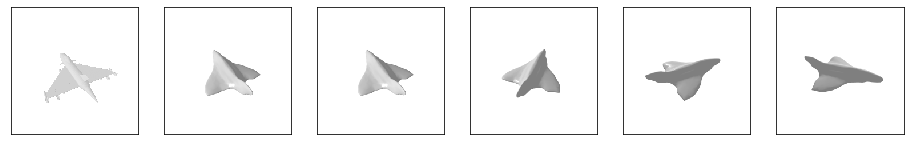

fcd7a8834a7f26f15069db69b8c1c70 -- uncorrected
{'azim': 350.76495361328125, 'elev': 40.0, 'dist': 1.0}


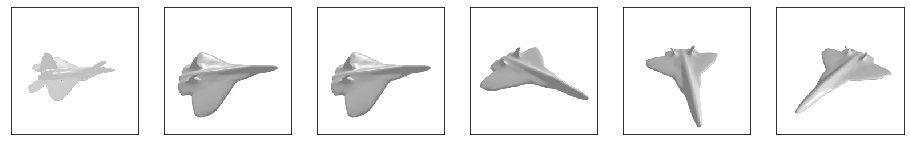

fcd7a8834a7f26f15069db69b8c1c70 -- corrected
{'azim': 350.76495361328125, 'elev': 40.0, 'dist': 1.2692307233810425}


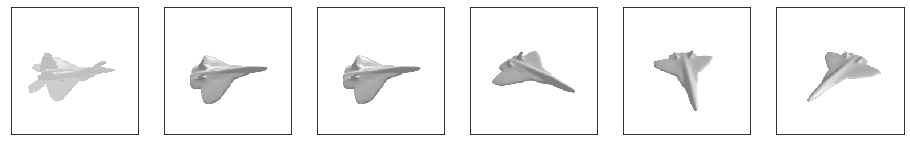

398ff83ba75191f050405f236096897d -- uncorrected
{'azim': 257.87469482421875, 'elev': 40.0, 'dist': 1.0}


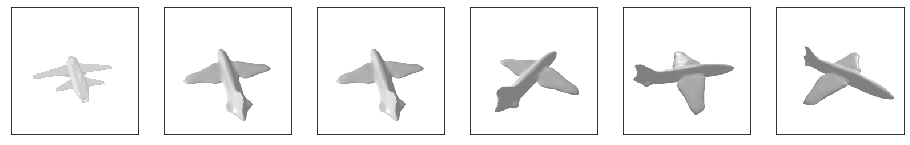

398ff83ba75191f050405f236096897d -- corrected
{'azim': 257.87469482421875, 'elev': 40.0, 'dist': 1.3333332538604736}


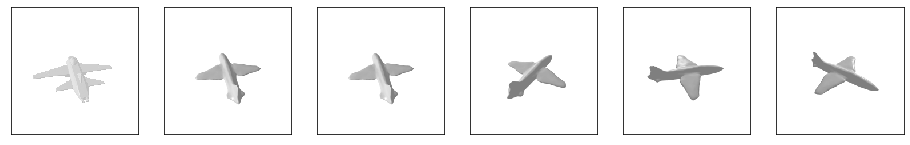

85da8ecc055fc6cb58328b65a4733701 -- uncorrected
{'azim': 137.19879150390625, 'elev': 40.0, 'dist': 1.0}


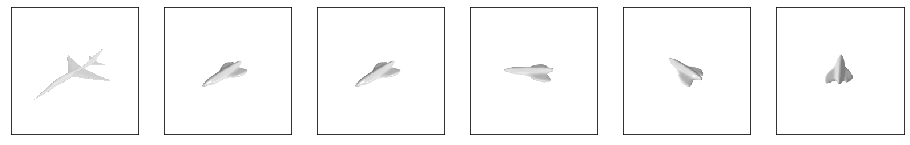

85da8ecc055fc6cb58328b65a4733701 -- corrected
{'azim': 137.19879150390625, 'elev': 40.0, 'dist': 0.8205128312110901}


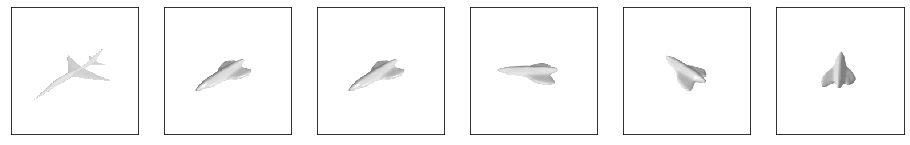

f2975fde05d9d63eeea0c0561850e04e -- uncorrected
{'azim': 282.2289733886719, 'elev': 40.0, 'dist': 1.0}


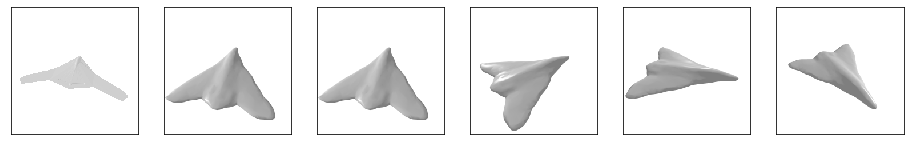

f2975fde05d9d63eeea0c0561850e04e -- corrected
{'azim': 282.2289733886719, 'elev': 40.0, 'dist': 1.7179487943649292}


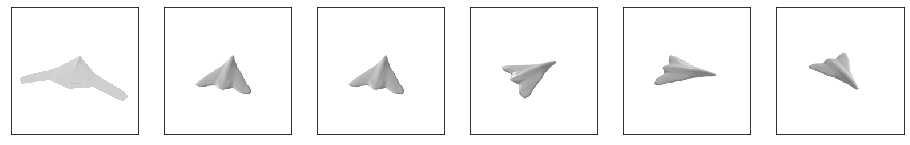

In [4]:
show_num = 20
uncorrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_img, "renders_camera_params.pt"), "rb"))
corrected_pred_poses_dict = pickle.load(open(os.path.join(input_dir_mesh, "rec_camera_params.pt"), "rb"))

for i, instance in enumerate(uncorrected_pred_poses_dict):
    input_img_path = os.path.join(input_dir_img,"{}.png".format(instance))
    input_image = np.asarray(Image.open(input_img_path))
    input_mesh_path = os.path.join(input_dir_mesh,"{}.obj".format(instance))
    input_mesh = general_utils.load_untextured_mesh(input_mesh_path, device)
    
    print("{} -- uncorrected".format(instance))
    print(uncorrected_pred_poses_dict[instance])
    dist = uncorrected_pred_poses_dict[instance]["dist"]
    elev = uncorrected_pred_poses_dict[instance]["elev"]
    azim = uncorrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    
    print("{} -- corrected".format(instance))
    print(corrected_pred_poses_dict[instance])
    dist = corrected_pred_poses_dict[instance]["dist"]
    elev = corrected_pred_poses_dict[instance]["elev"]
    azim = corrected_pred_poses_dict[instance]["azim"]
    visualization_tools.show_refinement_results(input_image, input_mesh, input_mesh, dist, elev, azim, device)
    if i > show_num:
        break
    print("======================================================================================================================================================================")
    print("======================================================================================================================================================================")